In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
def prettyplot(weeks, keyword, 
               by_week_freq_keyword_in_postTitle_coronavirus, rel_by_week_freq_keyword_in_postTitle_coronavirus,
               by_week_freq_keyword_in_postTitle_covid19, rel_by_week_freq_keyword_in_postTitle_covid19,
               by_week_freq_keyword_in_postTitle_china_flu, rel_by_week_freq_keyword_in_postTitle_china_flu):
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    axes[0].plot(weeks, by_week_freq_keyword_in_postTitle_coronavirus,
                 weeks, by_week_freq_keyword_in_postTitle_covid19, 
                 weeks, by_week_freq_keyword_in_postTitle_china_flu)
    axes[0].set_xlabel('Weeks');
    axes[0].set_xlim([1, len(weeks)]);
    axes[0].set_xticks([(i+1) for i in range(len(weeks))]); axes[0].set_xticklabels(['w'+str(i+1) for i in range(len(weeks))]);
    axes[0].set_ylabel('Frequency');
    axes[0].set_title('Graph comparing frequencies for {} in post titles'.format(keyword))
    axes[0].legend(['coronavirus', 'covid19', 'china_flu'])
    
    axes[1].plot(weeks, rel_by_week_freq_keyword_in_postTitle_coronavirus, 
                 weeks, rel_by_week_freq_keyword_in_postTitle_covid19, 
                 weeks, rel_by_week_freq_keyword_in_postTitle_china_flu)
    axes[1].set_xlabel('Weeks');
    axes[1].set_xlim([1, len(weeks)]);
    axes[1].set_xticks([(i+1) for i in range(len(weeks))]); axes[1].set_xticklabels(['w'+str(i+1) for i in range(len(weeks))]);
    axes[1].set_ylabel('Relative frequency');
    axes[1].set_title('Graph comparing relative frequencies for {} in post titles'.format(keyword))
    axes[1].legend(['coronavirus', 'covid19', 'china_flu'])
    plt.savefig('{}.png'.format(keyword))
    plt.show()

# 1)
## Frequency of occurence / Popularity analysis :

### Keywords we are going to use in the frequency/popularity analysis :
* chloroquine
* remdesivir
* mask
* social distancing
* vaccine

### Generationof the queries done here

In [4]:
######################################################################################################################
#### GENERATE THE QUERIES
######################################################################################################################
keyword = 'vaccine'
subreddit = 'covid19'
number = 16

myQuery = ""
start_date = [1577836800,1578441600,1579046400,1579651200,1580256000,1580860800,1581465600,1582070400,
              1582675200,1583280000,1583884800,1584489600,1585094400,1585699200,1586304000,1586908800]
end_date = [1578441600,1579046400,1579651200,1580256000,1580860800,1581465600,1582070400,1582675200,
            1583280000,1583884800,1584489600,1585094400,1585699200,1586304000,1586908800,1587513600]

for i in range(number):
    myQuery += 'match (sr{}:Subreddit {{display_name:\'{}\'}})--(p{}:Post) \n'.format(i+1, subreddit, i+1)
    myQuery += 'where {} <= p{}.created_utc <= {} \n'.format(start_date[i], i+1, end_date[i])
    myQuery += 'and toLower(p{}.title) contains \'{}\' \n'.format(i+1, keyword)
    myQuery += 'return count(p{}) as cnt{}\n'.format(i+1, i+1)
    myQuery += '\n'

#print(myQuery[:-2])

In [5]:
weeks = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]);
total_by_week_posts_coronavirus = np.array([0, 0, 4, 2628, 5258, 5518, 4704, 7020, 14887, 21786, 38390, 
                                            30355, 23371, 19558, 14628, 12359]);
total_by_week_posts_covid19 = np.array([0, 0, 0, 0, 0, 13, 388, 464, 964, 1058, 1593, 2295, 1968, 1565, 1289, 1164]);
total_by_week_posts_china_flu = np.array([0, 0, 101, 3985, 5632, 4358, 3524, 5136, 7886, 6879, 8048, 5477,
                                          4590, 3637, 2796, 2445]);

## For chloroquine:

In [6]:
by_week_freq_chloroquine_in_postTitle_coronavirus = np.array([0, 0, 0, 0, 0, 3, 4, 9, 15, 11, 31, 271, 151, 227, 182, 93]);
rel_by_week_freq_chloroquine_in_postTitle_coronavirus = np.divide(by_week_freq_chloroquine_in_postTitle_coronavirus, total_by_week_posts_coronavirus, where=(total_by_week_posts_coronavirus!=0), out=np.zeros(len(weeks)))

by_week_freq_chloroquine_in_postTitle_covid19 = np.array([0, 0, 0, 0, 0, 0, 3, 7, 10, 11, 19, 47, 30, 23, 35, 11]);
rel_by_week_freq_chloroquine_in_postTitle_covid19 = np.divide(by_week_freq_chloroquine_in_postTitle_covid19, total_by_week_posts_covid19, where=(total_by_week_posts_covid19!=0), out=np.zeros(len(weeks)))

by_week_freq_chloroquine_in_postTitle_china_flu =np.array([0, 0, 0, 0, 1, 3, 1, 3, 8, 3, 17, 69, 51, 48, 24, 22]);
rel_by_week_freq_chloroquine_in_postTitle_china_flu = np.divide(by_week_freq_chloroquine_in_postTitle_china_flu, total_by_week_posts_china_flu, where=(total_by_week_posts_china_flu!=0), out=np.zeros(len(weeks)))

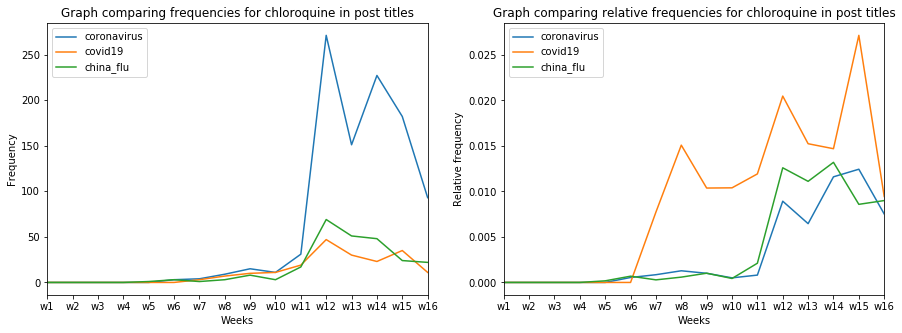

In [7]:
prettyplot(weeks, 'chloroquine', 
           by_week_freq_chloroquine_in_postTitle_coronavirus, rel_by_week_freq_chloroquine_in_postTitle_coronavirus, 
           by_week_freq_chloroquine_in_postTitle_covid19, rel_by_week_freq_chloroquine_in_postTitle_covid19, 
           by_week_freq_chloroquine_in_postTitle_china_flu, rel_by_week_freq_chloroquine_in_postTitle_china_flu)

## For remdesivir:

In [8]:
by_week_freq_remdesivir_in_postTitle_coronavirus =np.array([0, 0, 0, 0, 3, 2, 2, 6, 17, 4, 17, 18, 14, 5, 19, 38]);
rel_by_week_freq_remdesivir_in_postTitle_coronavirus = np.divide(by_week_freq_remdesivir_in_postTitle_coronavirus, total_by_week_posts_coronavirus, where=(total_by_week_posts_coronavirus!=0), out=np.zeros(len(weeks)))

by_week_freq_remdesivir_in_postTitle_covid19 =np.array([0, 0, 0, 0, 0, 0, 5, 1, 8, 4, 3, 3, 1, 5, 10, 10]);
rel_by_week_freq_remdesivir_in_postTitle_covid19 = np.divide(by_week_freq_remdesivir_in_postTitle_covid19, total_by_week_posts_covid19, where=(total_by_week_posts_covid19!=0), out=np.zeros(len(weeks)))

by_week_freq_remdesivir_in_postTitle_china_flu =np.array([0, 0, 0, 0, 6, 13, 6, 2, 6, 1, 6, 5, 0, 4, 4, 15]);
rel_by_week_freq_remdesivir_in_postTitle_china_flu = np.divide(by_week_freq_remdesivir_in_postTitle_china_flu, total_by_week_posts_china_flu, where=(total_by_week_posts_china_flu!=0), out=np.zeros(len(weeks)))

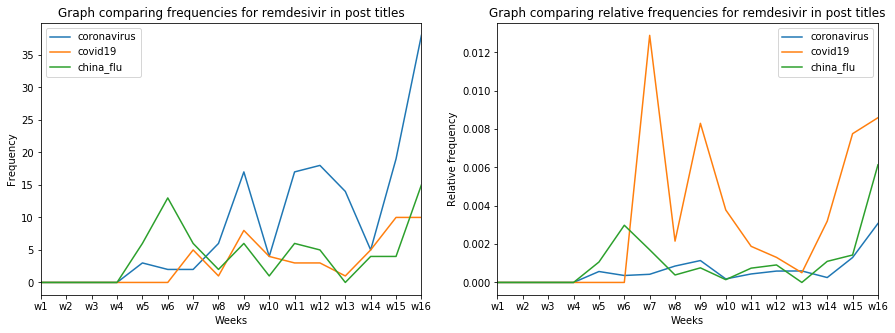

In [9]:
prettyplot(weeks, 'remdesivir', 
           by_week_freq_remdesivir_in_postTitle_coronavirus, rel_by_week_freq_remdesivir_in_postTitle_coronavirus, 
           by_week_freq_remdesivir_in_postTitle_covid19, rel_by_week_freq_remdesivir_in_postTitle_covid19, 
           by_week_freq_remdesivir_in_postTitle_china_flu, rel_by_week_freq_remdesivir_in_postTitle_china_flu)

## For vaccine:

In [10]:
by_week_freq_vaccine_in_postTitle_coronavirus = np.array([0, 0, 0, 18, 33, 41, 52, 81, 129, 148, 456, 203, 163, 298, 247, 187]);
rel_by_week_freq_vaccine_in_postTitle_coronavirus = np.divide(by_week_freq_vaccine_in_postTitle_coronavirus, total_by_week_posts_coronavirus, where=(total_by_week_posts_coronavirus!=0), out=np.zeros(len(weeks)))

by_week_freq_vaccine_in_postTitle_covid19 = np.array([0, 0, 0, 0, 0, 0, 4, 15, 12, 15, 22, 25, 30, 40, 20, 31]);
rel_by_week_freq_vaccine_in_postTitle_covid19 = np.divide(by_week_freq_vaccine_in_postTitle_covid19, total_by_week_posts_covid19, where=(total_by_week_posts_covid19!=0), out=np.zeros(len(weeks)))

by_week_freq_vaccine_in_postTitle_china_flu = np.array([0, 0, 2, 31, 52, 31, 29, 66, 72, 61, 70, 43, 39, 35, 47, 41]);
rel_by_week_freq_vaccine_in_postTitle_china_flu = np.divide(by_week_freq_vaccine_in_postTitle_china_flu, total_by_week_posts_china_flu, where=(total_by_week_posts_china_flu!=0), out=np.zeros(len(weeks)))

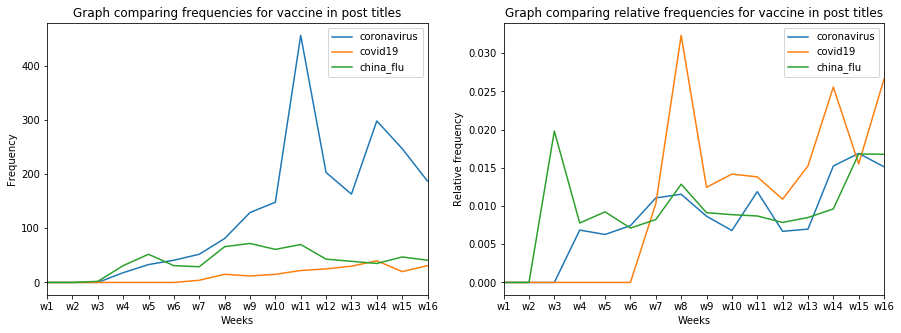

In [11]:
prettyplot(weeks, 'vaccine', 
           by_week_freq_vaccine_in_postTitle_coronavirus, rel_by_week_freq_vaccine_in_postTitle_coronavirus, 
           by_week_freq_vaccine_in_postTitle_covid19, rel_by_week_freq_vaccine_in_postTitle_covid19, 
           by_week_freq_vaccine_in_postTitle_china_flu, rel_by_week_freq_vaccine_in_postTitle_china_flu)

## For mask:

In [12]:
by_week_freq_mask_in_postTitle_coronavirus = np.array([0, 0, 0, 101, 250, 184, 134, 185, 450, 456, 537, 823, 863,                                                      1239, 473, 371]);
rel_by_week_freq_mask_in_postTitle_coronavirus = np.divide(by_week_freq_mask_in_postTitle_coronavirus, total_by_week_posts_coronavirus, where=(total_by_week_posts_coronavirus!=0), out=np.zeros(len(weeks)))

by_week_freq_mask_in_postTitle_covid19 = np.array([0, 0, 0, 0, 0, 0, 1, 10, 37, 25, 36, 99, 110, 97, 36, 33]);
rel_by_week_freq_mask_in_postTitle_covid19 = np.divide(by_week_freq_mask_in_postTitle_covid19, total_by_week_posts_covid19, where=(total_by_week_posts_covid19!=0), out=np.zeros(len(weeks)))

by_week_freq_mask_in_postTitle_china_flu = np.array([0, 0, 0, 136, 171, 116, 90, 121, 254, 207, 220, 229, 221, 295, 108, 75]);
rel_by_week_freq_mask_in_postTitle_china_flu = np.divide(by_week_freq_mask_in_postTitle_china_flu, total_by_week_posts_china_flu, where=(total_by_week_posts_china_flu!=0), out=np.zeros(len(weeks)))

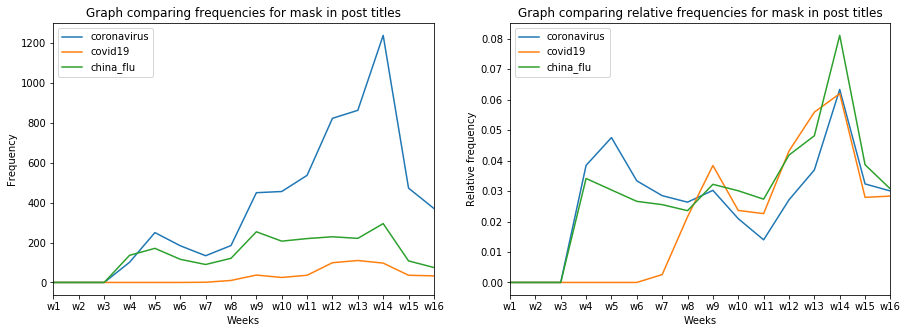

In [13]:
prettyplot(weeks, 'mask', 
           by_week_freq_mask_in_postTitle_coronavirus, rel_by_week_freq_mask_in_postTitle_coronavirus, 
           by_week_freq_mask_in_postTitle_covid19, rel_by_week_freq_mask_in_postTitle_covid19, 
           by_week_freq_mask_in_postTitle_china_flu, rel_by_week_freq_mask_in_postTitle_china_flu)

## For ventilator:

In [14]:
by_week_freq_ventilator_in_postTitle_coronavirus = np.array([0, 0, 0, 0, 1, 0, 0, 5, 8, 10, 95, 354, 462, 394, 176, 112]);
rel_by_week_freq_ventilator_in_postTitle_coronavirus = np.divide(by_week_freq_ventilator_in_postTitle_coronavirus, total_by_week_posts_coronavirus, where=(total_by_week_posts_coronavirus!=0), out=np.zeros(len(weeks)))

by_week_freq_ventilator_in_postTitle_covid19 = np.array([0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 10, 23, 42, 33, 15, 12]);
rel_by_week_freq_ventilator_in_postTitle_covid19 = np.divide(by_week_freq_ventilator_in_postTitle_covid19, total_by_week_posts_covid19, where=(total_by_week_posts_covid19!=0), out=np.zeros(len(weeks)))

by_week_freq_ventilator_in_postTitle_china_flu = np.array([0, 0, 0, 0, 1, 0, 2, 1, 2, 6, 28, 51, 84, 56, 39, 25]);
rel_by_week_freq_ventilator_in_postTitle_china_flu = np.divide(by_week_freq_ventilator_in_postTitle_china_flu, total_by_week_posts_china_flu, where=(total_by_week_posts_china_flu!=0), out=np.zeros(len(weeks)))

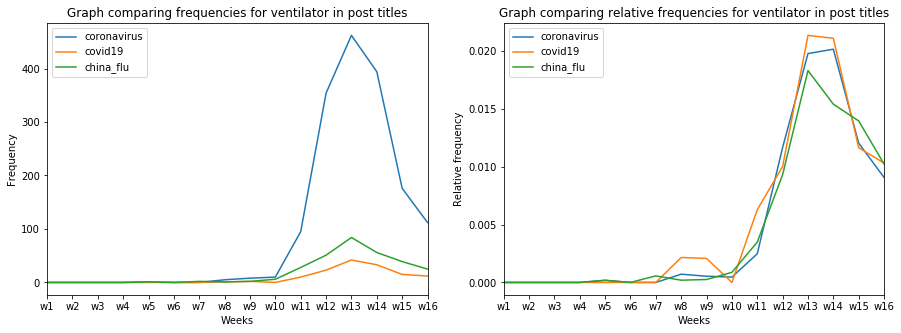

In [15]:
prettyplot(weeks, 'ventilator', 
           by_week_freq_ventilator_in_postTitle_coronavirus, rel_by_week_freq_ventilator_in_postTitle_coronavirus, 
           by_week_freq_ventilator_in_postTitle_covid19, rel_by_week_freq_ventilator_in_postTitle_covid19, 
           by_week_freq_ventilator_in_postTitle_china_flu, rel_by_week_freq_ventilator_in_postTitle_china_flu)

## For social distancing:

In [16]:
by_week_freq_socialdistancing_in_postTitle_coronavirus = np.array([0, 0, 0, 0, 0, 0, 1, 0, 3, 18, 243, 317, 313, 189, 176, 124]);
rel_by_week_freq_socialdistancing_in_postTitle_coronavirus = np.divide(by_week_freq_socialdistancing_in_postTitle_coronavirus, total_by_week_posts_coronavirus, where=(total_by_week_posts_coronavirus!=0), out=np.zeros(len(weeks)))

by_week_freq_socialdistancing_in_postTitle_covid19 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 13, 28, 34, 12, 9, 15]);
rel_by_week_freq_socialdistancing_in_postTitle_covid19 = np.divide(by_week_freq_socialdistancing_in_postTitle_covid19, total_by_week_posts_covid19, where=(total_by_week_posts_covid19!=0), out=np.zeros(len(weeks)))

by_week_freq_socialdistancing_in_postTitle_china_flu = np.array([0, 0, 0, 0, 0, 0, 0, 1, 5, 6, 52, 51, 60, 42, 31, 21]);
rel_by_week_freq_socialdistancing_in_postTitle_china_flu = np.divide(by_week_freq_socialdistancing_in_postTitle_china_flu, total_by_week_posts_china_flu, where=(total_by_week_posts_china_flu!=0), out=np.zeros(len(weeks)))

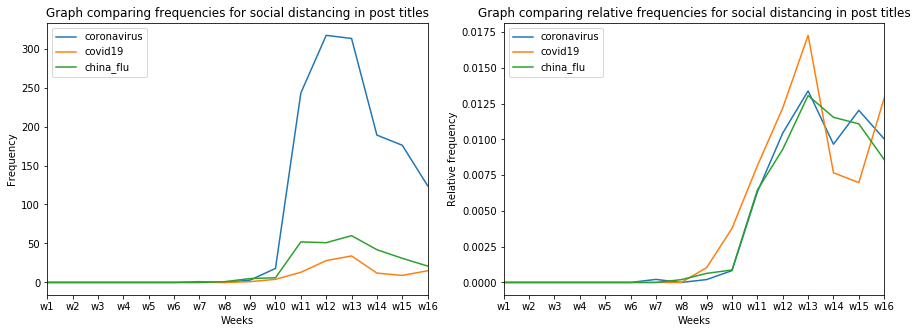

In [17]:
prettyplot(weeks, 'social distancing', 
           by_week_freq_socialdistancing_in_postTitle_coronavirus, rel_by_week_freq_socialdistancing_in_postTitle_coronavirus, 
           by_week_freq_socialdistancing_in_postTitle_covid19, rel_by_week_freq_socialdistancing_in_postTitle_covid19, 
           by_week_freq_socialdistancing_in_postTitle_china_flu, rel_by_week_freq_socialdistancing_in_postTitle_china_flu)

## MERGED GRAPHS PER SUBREDDIT

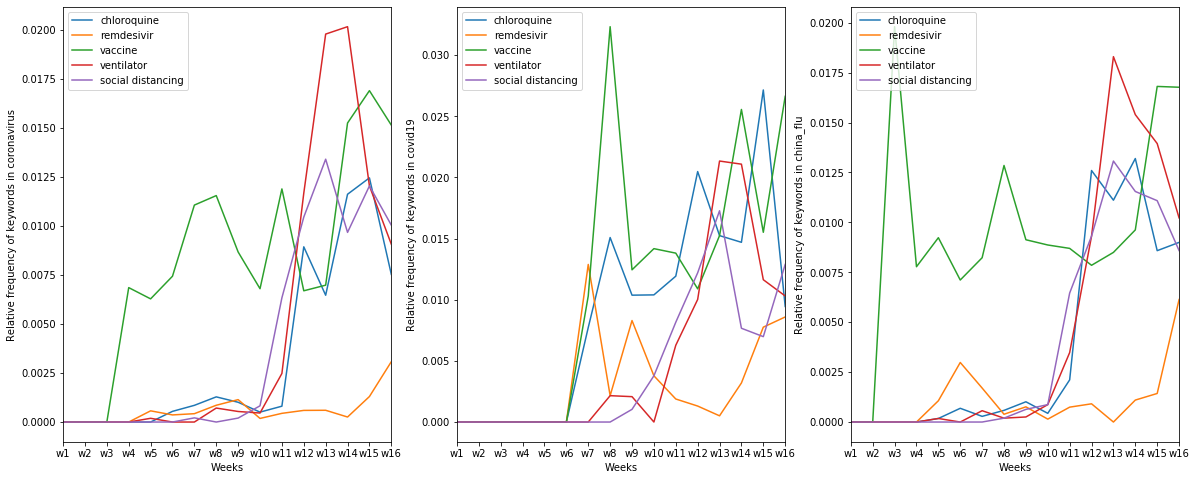

In [18]:
def prettyplot3(save_as='img.png'):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
    axes[0].plot(weeks, rel_by_week_freq_chloroquine_in_postTitle_coronavirus,
                 weeks, rel_by_week_freq_remdesivir_in_postTitle_coronavirus,
                 weeks, rel_by_week_freq_vaccine_in_postTitle_coronavirus,
                 weeks, rel_by_week_freq_ventilator_in_postTitle_coronavirus,
                 weeks, rel_by_week_freq_socialdistancing_in_postTitle_coronavirus,
                 #weeks, rel_by_week_freq_mask_in_postTitle_coronavirus,
                )
    axes[0].set_xlabel('Weeks');
    axes[0].set_xlim([1, len(weeks)]);
    axes[0].set_xticks([(i+1) for i in range(len(weeks))]); 
    axes[0].set_xticklabels(['w'+str(i+1) for i in range(len(weeks))]);
    axes[0].set_ylabel('Relative frequency of keywords in coronavirus');
    axes[0].legend(['chloroquine', 'remdesivir', 'vaccine', 'ventilator', 'social distancing', 'mask'], loc='upper left')
    
    axes[1].plot(weeks, rel_by_week_freq_chloroquine_in_postTitle_covid19,
                 weeks, rel_by_week_freq_remdesivir_in_postTitle_covid19,
                 weeks, rel_by_week_freq_vaccine_in_postTitle_covid19,
                 weeks, rel_by_week_freq_ventilator_in_postTitle_covid19,
                 weeks, rel_by_week_freq_socialdistancing_in_postTitle_covid19,
                 #weeks, rel_by_week_freq_mask_in_postTitle_covid19,
                )
    axes[1].set_xlabel('Weeks');
    axes[1].set_xlim([1, len(weeks)]);
    axes[1].set_xticks([(i+1) for i in range(len(weeks))]); 
    axes[1].set_xticklabels(['w'+str(i+1) for i in range(len(weeks))]);
    axes[1].set_ylabel('Relative frequency of keywords in covid19');
    axes[1].legend(['chloroquine', 'remdesivir', 'vaccine', 'ventilator', 'social distancing', 'mask'], loc='upper left')
    
    axes[2].plot(weeks, rel_by_week_freq_chloroquine_in_postTitle_china_flu,
                 weeks, rel_by_week_freq_remdesivir_in_postTitle_china_flu,
                 weeks, rel_by_week_freq_vaccine_in_postTitle_china_flu,
                 weeks, rel_by_week_freq_ventilator_in_postTitle_china_flu,
                 weeks, rel_by_week_freq_socialdistancing_in_postTitle_china_flu,
                 #weeks, rel_by_week_freq_mask_in_postTitle_china_flu,
                )
    axes[2].set_xlabel('Weeks');
    axes[2].set_xlim([1, len(weeks)]);
    axes[2].set_xticks([(i+1) for i in range(len(weeks))]); 
    axes[2].set_xticklabels(['w'+str(i+1) for i in range(len(weeks))]);
    axes[2].set_ylabel('Relative frequency of keywords in china_flu');
    axes[2].legend(['chloroquine', 'remdesivir', 'vaccine', 'ventilator', 'social distancing', 'mask'], loc='upper left')
    
    plt.savefig(save_as)
    plt.show()
    
#prettyplot3(save_as='all_three.png')
prettyplot3(save_as='all_three_without_mask.png')


# 2)
## Are redditors likely to blatantly copy and paste someone else's article from a subreddit to another to increase their karma in order to satisfy their childish ego ? 
### It's up to the reader answer that question but the author has made up his mind.
We restrict our analysis to the three 'main' subreddits, namely coronavirus, covid19 and china_flu for counting copies within, but we will also include 'europe', 'lifeprotips','science','videos', 'technology', 'iama', 'todayilearned', 'askreddit', 'explainlikeimfive', 'news', 'nottheonion', 'politics', 'upliftingnews', 'askscience', 'worldnews', 'dataisbeautiful' for potential sources of copy.

## For the topic 'chloroquine', in 'coronavirus' subreddit 
(has to be adapted accordingly for other keywords and other subreddits)

#### Base query for getting the copies with author of new post = original author and subreddit of origin in ['coronavirus', 'covid19', 'china_flu', 'europe', 'lifeprotips','science','videos', 'technology', 'iama', 'todayilearned', 'askreddit', 'explainlikeimfive', 'news', 'nottheonion', 'politics', 'upliftingnews', 'askscience', 'worldnews', 'dataisbeautiful']

match (sr:Subreddit {display_name:'coronavirus'})--(p:Post)--(u:User)
where toLower(p.title) contains 'chloroquine'
match (sr2:Subreddit)--(p2:Post)--(u2:User)
where sr2.display_name in ['coronavirus', 'covid19', 'china_flu', 'europe', 'lifeprotips','science','videos', 'technology', 'iama', 'todayilearned', 'askreddit', 'explainlikeimfive', 'news', 'nottheonion', 'politics', 'upliftingnews', 'askscience', 'worldnews', 'dataisbeautiful']
and toLower(p2.title) = toLower(p.title)
and p2.created_utc < p.created_utc
and u2.username = u.username
return distinct p.id, p.title, u.username, u2.username, p.created_utc, sr2.display_name order by p.title

#### Base query for getting the copies with author of new post != original author and subreddit of origin in ['coronavirus', 'covid19', 'china_flu', 'europe', 'lifeprotips','science','videos', 'technology', 'iama', 'todayilearned', 'askreddit', 'explainlikeimfive', 'news', 'nottheonion', 'politics', 'upliftingnews', 'askscience', 'worldnews', 'dataisbeautiful']

match (sr:Subreddit {display_name:'coronavirus'})--(p:Post)--(u:User)
where toLower(p.title) contains 'chloroquine'
match (sr2:Subreddit)--(p2:Post)--(u2:User)
where sr2.display_name in ['coronavirus', 'covid19', 'china_flu', 'europe', 'lifeprotips','science','videos', 'technology', 'iama', 'todayilearned', 'askreddit', 'explainlikeimfive', 'news', 'nottheonion', 'politics', 'upliftingnews', 'askscience', 'worldnews', 'dataisbeautiful']
and toLower(p2.title) = toLower(p.title)
and p2.created_utc < p.created_utc
and u2.username <> u.username
return distinct p.id, p.title, u.username, u2.username, p.created_utc, sr2.display_name order by p.title

#### Base query for getting the copies of the posts having chloroquine in their title in coronavirus subreddit from subreddit of origin in ['coronavirus', 'covid19', 'china_flu', 'europe', 'lifeprotips','science','videos', 'technology', 'iama', 'todayilearned', 'askreddit', 'explainlikeimfive', 'news', 'nottheonion', 'politics', 'upliftingnews', 'askscience', 'worldnews', 'dataisbeautiful']

match (sr:Subreddit {display_name:'coronavirus'})--(p:Post)--(u:User)
where toLower(p.title) contains 'chloroquine'
match (sr2:Subreddit)--(p2:Post)--(u2:User)
where sr2.display_name in ['coronavirus', 'covid19', 'china_flu', 'europe', 'lifeprotips','science','videos', 'technology', 'iama', 'todayilearned', 'askreddit', 'explainlikeimfive', 'news', 'nottheonion', 'politics', 'upliftingnews', 'askscience', 'worldnews', 'dataisbeautiful']
and toLower(p2.title) = toLower(p.title)
and p2.created_utc < p.created_utc
return distinct p.id, p.title, u.username, u2.username, p.created_utc, sr2.display_name order by p.title

The sum of the row numbers of first and second query should give the number of rows returned by the last query

#### Base query for getting the number of posts containing a keyword in a subreddit.
match (sr:Subreddit {display_name:'coronavirus'})--(p:Post)--(u:User)
where toLower(p.title) contains 'chloroquine'
return count(distinct p.id)

In [19]:
# CHLOROQUINE
n_posts_chloroquine_in_coronavirus = 742
original_author_posts_chloroquine_in_coronavirus = 28
plagiarized_posts_chloroquine_in_coronavirus = 168
copied_posts_chloroquine_in_coronavirus = 196

n_posts_chloroquine_in_covid19 = 162
original_author_posts_chloroquine_in_covid19 = 8
plagiarized_posts_chloroquine_in_covid19 = 18
copied_posts_chloroquine_in_covid19 = 26

n_posts_chloroquine_in_china_flu = 208
original_author_posts_chloroquine_in_china_flu = 21
plagiarized_posts_chloroquine_in_china_flu = 34
copied_posts_chloroquine_in_china_flu = 55

non_copied_posts_chloroquine_in_coronavirus = n_posts_chloroquine_in_coronavirus - copied_posts_chloroquine_in_coronavirus
non_copied_posts_chloroquine_in_covid19 = n_posts_chloroquine_in_covid19 - copied_posts_chloroquine_in_covid19
non_copied_posts_chloroquine_in_china_flu = n_posts_chloroquine_in_china_flu - copied_posts_chloroquine_in_china_flu
#####################################################################################################################
chloroquine_bar = {'non_copied': np.array([non_copied_posts_chloroquine_in_coronavirus, 
                                           non_copied_posts_chloroquine_in_covid19,
                                           non_copied_posts_chloroquine_in_china_flu]),
                   'plagiarized': np.array([plagiarized_posts_chloroquine_in_coronavirus, 
                                            plagiarized_posts_chloroquine_in_covid19, 
                                            plagiarized_posts_chloroquine_in_china_flu]), 
                   'original': np.array([original_author_posts_chloroquine_in_coronavirus, 
                                         original_author_posts_chloroquine_in_covid19, 
                                         original_author_posts_chloroquine_in_china_flu])
                  }

In [20]:
#print((copied_posts_chloroquine_in_coronavirus/n_posts_chloroquine_in_coronavirus)*100)
#print((copied_posts_chloroquine_in_covid19/n_posts_chloroquine_in_covid19)*100)
#print((copied_posts_chloroquine_in_china_flu/n_posts_chloroquine_in_china_flu)*100)
#print('-')
#print((original_author_posts_chloroquine_in_coronavirus/copied_posts_chloroquine_in_coronavirus)*100)
#print((original_author_posts_chloroquine_in_covid19/copied_posts_chloroquine_in_covid19)*100)
#print((original_author_posts_chloroquine_in_china_flu/copied_posts_chloroquine_in_china_flu)*100)

In [21]:
# REMDESIVIR
n_posts_remdesivir_in_coronavirus = 114
original_author_posts_remdesivir_in_coronavirus = 7
plagiarized_posts_remdesivir_in_coronavirus = 6
copied_posts_remdesivir_in_coronavirus = 13

n_posts_remdesivir_in_covid19 = 43
original_author_posts_remdesivir_in_covid19 = 7
plagiarized_posts_remdesivir_in_covid19 = 5
copied_posts_remdesivir_in_covid19 = 12

n_posts_remdesivir_in_china_flu = 55
original_author_posts_remdesivir_in_china_flu = 5
plagiarized_posts_remdesivir_in_china_flu = 3
copied_posts_remdesivir_in_china_flu = 8

non_copied_posts_remdesivir_in_coronavirus = n_posts_remdesivir_in_coronavirus-copied_posts_remdesivir_in_coronavirus
non_copied_posts_remdesivir_in_covid19 = n_posts_remdesivir_in_covid19-copied_posts_remdesivir_in_covid19
non_copied_posts_remdesivir_in_china_flu = n_posts_remdesivir_in_china_flu-copied_posts_remdesivir_in_china_flu
#####################################################################################################################
remdesivir_bar = {'non_copied': np.array([non_copied_posts_remdesivir_in_coronavirus, 
                                           non_copied_posts_remdesivir_in_covid19,
                                           non_copied_posts_remdesivir_in_china_flu]),
                   'plagiarized': np.array([plagiarized_posts_remdesivir_in_coronavirus, 
                                            plagiarized_posts_remdesivir_in_covid19, 
                                            plagiarized_posts_remdesivir_in_china_flu]), 
                   'original': np.array([original_author_posts_remdesivir_in_coronavirus, 
                                         original_author_posts_remdesivir_in_covid19, 
                                         original_author_posts_remdesivir_in_china_flu])
                  }

In [22]:
#print((copied_posts_remdesivir_in_coronavirus/n_posts_remdesivir_in_coronavirus)*100)
#print((copied_posts_remdesivir_in_covid19/n_posts_remdesivir_in_covid19)*100)
#print((copied_posts_remdesivir_in_china_flu/n_posts_remdesivir_in_china_flu)*100)
#print('-')
#print((original_author_posts_remdesivir_in_coronavirus/copied_posts_remdesivir_in_coronavirus)*100)
#print((original_author_posts_remdesivir_in_covid19/copied_posts_remdesivir_in_covid19)*100)
#print((original_author_posts_remdesivir_in_china_flu/copied_posts_remdesivir_in_china_flu)*100)

In [23]:
# VACCINE
n_posts_vaccine_in_coronavirus = 1568
original_author_posts_vaccine_in_coronavirus = 113
plagiarized_posts_vaccine_in_coronavirus = 339
copied_posts_vaccine_in_coronavirus = 452

n_posts_vaccine_in_covid19 = 174
original_author_posts_vaccine_in_covid19 = 30
plagiarized_posts_vaccine_in_covid19 = 36
copied_posts_vaccine_in_covid19 = 66

n_posts_vaccine_in_china_flu = 507
original_author_posts_vaccine_in_china_flu = 67
plagiarized_posts_vaccine_in_china_flu = 110
copied_posts_vaccine_in_china_flu = 177

non_copied_posts_vaccine_in_coronavirus = n_posts_vaccine_in_coronavirus - copied_posts_vaccine_in_coronavirus
non_copied_posts_vaccine_in_covid19 = n_posts_vaccine_in_covid19 - copied_posts_vaccine_in_covid19
non_copied_posts_vaccine_in_china_flu = n_posts_vaccine_in_china_flu - copied_posts_vaccine_in_china_flu
#####################################################################################################################
vaccine_bar = {'non_copied': np.array([non_copied_posts_vaccine_in_coronavirus, 
                                           non_copied_posts_vaccine_in_covid19,
                                           non_copied_posts_vaccine_in_china_flu]),
                   'plagiarized': np.array([plagiarized_posts_vaccine_in_coronavirus, 
                                            plagiarized_posts_vaccine_in_covid19, 
                                            plagiarized_posts_vaccine_in_china_flu]), 
                   'original': np.array([original_author_posts_vaccine_in_coronavirus, 
                                         original_author_posts_vaccine_in_covid19, 
                                         original_author_posts_vaccine_in_china_flu])
                  }

In [24]:
#print((copied_posts_vaccine_in_coronavirus/n_posts_vaccine_in_coronavirus)*100)
#print((copied_posts_vaccine_in_covid19/n_posts_vaccine_in_covid19)*100)
#print((copied_posts_vaccine_in_china_flu/n_posts_vaccine_in_china_flu)*100)
#print('-')
#print((original_author_posts_vaccine_in_coronavirus/copied_posts_vaccine_in_coronavirus)*100)
#print((original_author_posts_vaccine_in_covid19/copied_posts_vaccine_in_covid19)*100)
#print((original_author_posts_vaccine_in_china_flu/copied_posts_vaccine_in_china_flu)*100)

In [25]:
# MASK
n_posts_mask_in_coronavirus = 4648
original_author_posts_mask_in_coronavirus = 175
plagiarized_posts_mask_in_coronavirus = 368
copied_posts_mask_in_coronavirus = 543

n_posts_mask_in_covid19 = 369
original_author_posts_mask_in_covid19 = 50
plagiarized_posts_mask_in_covid19 = 40
copied_posts_mask_in_covid19 = 90

n_posts_mask_in_china_flu = 1806
original_author_posts_mask_in_china_flu = 124
plagiarized_posts_mask_in_china_flu = 187
copied_posts_mask_in_china_flu = 311

non_copied_posts_mask_in_coronavirus = n_posts_mask_in_coronavirus - copied_posts_mask_in_coronavirus
non_copied_posts_mask_in_covid19 = n_posts_mask_in_covid19 - copied_posts_mask_in_covid19
non_copied_posts_mask_in_china_flu = n_posts_mask_in_china_flu - copied_posts_mask_in_china_flu
#####################################################################################################################
mask_bar = {'non_copied': np.array([non_copied_posts_mask_in_coronavirus, 
                                           non_copied_posts_mask_in_covid19,
                                           non_copied_posts_mask_in_china_flu]),
                   'plagiarized': np.array([plagiarized_posts_mask_in_coronavirus, 
                                            plagiarized_posts_mask_in_covid19, 
                                            plagiarized_posts_mask_in_china_flu]), 
                   'original': np.array([original_author_posts_mask_in_coronavirus, 
                                         original_author_posts_mask_in_covid19, 
                                         original_author_posts_mask_in_china_flu])
                  }

In [26]:
#print((copied_posts_mask_in_coronavirus/n_posts_mask_in_coronavirus)*100)
#print((copied_posts_mask_in_covid19/n_posts_mask_in_covid19)*100)
#print((copied_posts_mask_in_china_flu/n_posts_mask_in_china_flu)*100)
#print('-')
#print((original_author_posts_mask_in_coronavirus/copied_posts_mask_in_coronavirus)*100)
#print((original_author_posts_mask_in_covid19/copied_posts_mask_in_covid19)*100)
#print((original_author_posts_mask_in_china_flu/copied_posts_mask_in_china_flu)*100)

In [27]:
# VENTILATOR
n_posts_ventilator_in_coronavirus = 1270
original_author_posts_ventilator_in_coronavirus = 62
plagiarized_posts_ventilator_in_coronavirus = 190
copied_posts_ventilator_in_coronavirus = 252

n_posts_ventilator_in_covid19 = 117
original_author_posts_ventilator_in_covid19 = 13
plagiarized_posts_ventilator_in_covid19 = 25
copied_posts_ventilator_in_covid19 = 38

n_posts_ventilator_in_china_flu = 270
original_author_posts_ventilator_in_china_flu = 24
plagiarized_posts_ventilator_in_china_flu = 70
copied_posts_ventilator_in_china_flu = 94

non_copied_posts_ventilator_in_coronavirus = n_posts_ventilator_in_coronavirus - copied_posts_ventilator_in_coronavirus
non_copied_posts_ventilator_in_covid19 = n_posts_ventilator_in_covid19 - copied_posts_ventilator_in_covid19
non_copied_posts_ventilator_in_china_flu = n_posts_ventilator_in_china_flu - copied_posts_ventilator_in_china_flu
#####################################################################################################################
ventilator_bar = {'non_copied': np.array([non_copied_posts_ventilator_in_coronavirus, 
                                           non_copied_posts_ventilator_in_covid19,
                                           non_copied_posts_ventilator_in_china_flu]),
                   'plagiarized': np.array([plagiarized_posts_ventilator_in_coronavirus, 
                                            plagiarized_posts_ventilator_in_covid19, 
                                            plagiarized_posts_ventilator_in_china_flu]), 
                   'original': np.array([original_author_posts_ventilator_in_coronavirus, 
                                         original_author_posts_ventilator_in_covid19, 
                                         original_author_posts_ventilator_in_china_flu])
                  }

In [28]:
#print((copied_posts_ventilator_in_coronavirus/n_posts_ventilator_in_coronavirus)*100)
#print((copied_posts_ventilator_in_covid19/n_posts_ventilator_in_covid19)*100)
#print((copied_posts_ventilator_in_china_flu/n_posts_ventilator_in_china_flu)*100)
#print('-')
#print((original_author_posts_ventilator_in_coronavirus/copied_posts_ventilator_in_coronavirus)*100)
#print((original_author_posts_ventilator_in_covid19/copied_posts_ventilator_in_covid19)*100)
#print((original_author_posts_ventilator_in_china_flu/copied_posts_ventilator_in_china_flu)*100)

In [29]:
# SOCIAL DISTANCING
n_posts_socialdistancing_in_coronavirus = 1065
original_author_posts_socialdistancing_in_coronavirus = 29
plagiarized_posts_socialdistancing_in_coronavirus = 66
copied_posts_socialdistancing_in_coronavirus = 95

n_posts_socialdistancing_in_covid19 = 87
original_author_posts_socialdistancing_in_covid19 = 13
plagiarized_posts_socialdistancing_in_covid19 = 8
copied_posts_socialdistancing_in_covid19 = 21

n_posts_socialdistancing_in_china_flu = 226
original_author_posts_socialdistancing_in_china_flu = 16
plagiarized_posts_socialdistancing_in_china_flu = 29
copied_posts_socialdistancing_in_china_flu = 45

non_copied_posts_socialdistancing_in_coronavirus = n_posts_socialdistancing_in_coronavirus - copied_posts_socialdistancing_in_coronavirus
non_copied_posts_socialdistancing_in_covid19 = n_posts_socialdistancing_in_covid19 - copied_posts_socialdistancing_in_covid19
non_copied_posts_socialdistancing_in_china_flu = n_posts_socialdistancing_in_china_flu - copied_posts_socialdistancing_in_china_flu
#####################################################################################################################
socialdistancing_bar = {'non_copied': np.array([non_copied_posts_socialdistancing_in_coronavirus, 
                                           non_copied_posts_socialdistancing_in_covid19,
                                           non_copied_posts_socialdistancing_in_china_flu]),
                   'plagiarized': np.array([plagiarized_posts_socialdistancing_in_coronavirus, 
                                            plagiarized_posts_socialdistancing_in_covid19, 
                                            plagiarized_posts_socialdistancing_in_china_flu]), 
                   'original': np.array([original_author_posts_socialdistancing_in_coronavirus, 
                                         original_author_posts_socialdistancing_in_covid19, 
                                         original_author_posts_socialdistancing_in_china_flu])
                  }

In [30]:
#print((copied_posts_socialdistancing_in_coronavirus/n_posts_socialdistancing_in_coronavirus)*100)
#print((copied_posts_socialdistancing_in_covid19/n_posts_socialdistancing_in_covid19)*100)
#print((copied_posts_socialdistancing_in_china_flu/n_posts_socialdistancing_in_china_flu)*100)
#print('-')
#print((original_author_posts_socialdistancing_in_coronavirus/copied_posts_socialdistancing_in_coronavirus)*100)
#print((original_author_posts_socialdistancing_in_covid19/copied_posts_socialdistancing_in_covid19)*100)
#print((original_author_posts_socialdistancing_in_china_flu/copied_posts_socialdistancing_in_china_flu)*100)

# FINAL 2 BY 3 DISPLAY FIGURE

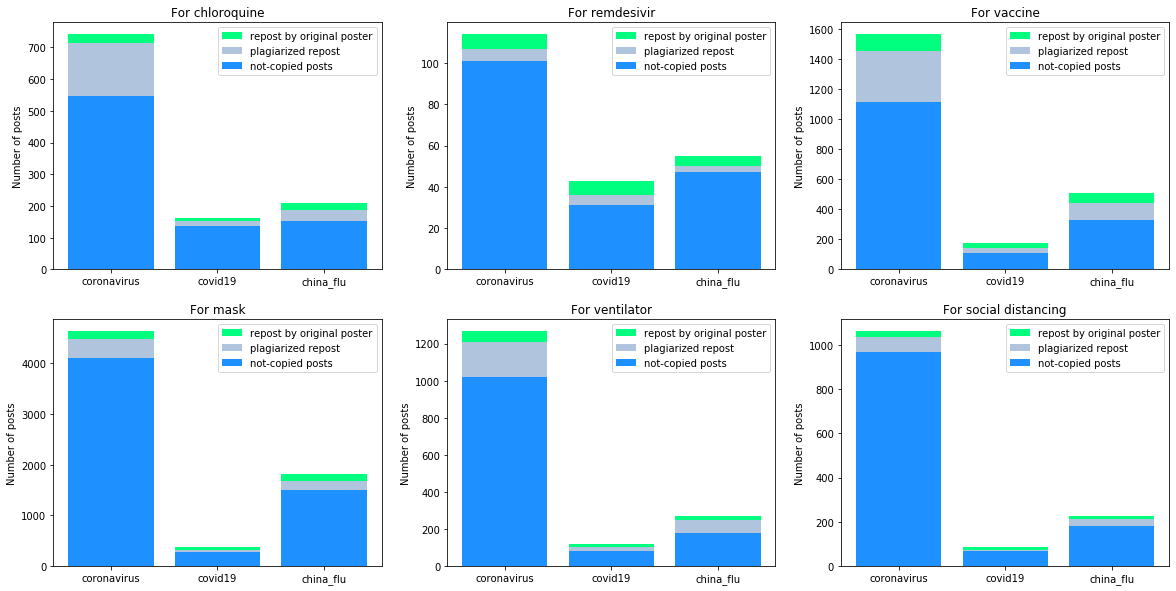

In [31]:
col1 = 'springgreen'
col2 = 'lightsteelblue'#'deepskyblue'
col3 = 'dodgerblue'
def prettyplot9(save_as='img.png'):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
    # 1 ###############################################################################################
    axes[0, 0].bar(['coronavirus', 'covid19', 'china_flu'],chloroquine_bar['original'], 
                   width=0.8, bottom=chloroquine_bar['non_copied']+chloroquine_bar['plagiarized'], 
                   color = col1, align='center')
    axes[0, 0].bar(['coronavirus', 'covid19', 'china_flu'], chloroquine_bar['plagiarized'], 
                   width=0.8, bottom=chloroquine_bar['non_copied'], 
                   color = col2, align='center')
    axes[0, 0].bar(['coronavirus', 'covid19', 'china_flu'], chloroquine_bar['non_copied'],
                   width=0.8, 
                   color = col3, align='center')
    axes[0, 0].set_ylabel('Number of posts');
    axes[0, 0].set_title('For chloroquine');
    axes[0, 0].legend(['repost by original poster', 'plagiarized repost', 'not-copied posts'], loc='upper right')
    # 2 ###############################################################################################
    axes[0, 1].bar(['coronavirus', 'covid19', 'china_flu'],remdesivir_bar['original'], 
                   width=0.8, bottom=remdesivir_bar['non_copied']+remdesivir_bar['plagiarized'], 
                   color = col1, align='center')
    axes[0, 1].bar(['coronavirus', 'covid19', 'china_flu'], remdesivir_bar['plagiarized'], 
                   width=0.8, bottom=remdesivir_bar['non_copied'], 
                   color = col2, align='center')
    axes[0, 1].bar(['coronavirus', 'covid19', 'china_flu'], remdesivir_bar['non_copied'],
                   width=0.8, 
                   color = col3, align='center')
    axes[0, 1].set_ylabel('Number of posts');
    axes[0, 1].set_title('For remdesivir');
    axes[0, 1].legend(['repost by original poster', 'plagiarized repost', 'not-copied posts'], loc='upper right')
    # 3 ###############################################################################################
    axes[0, 2].bar(['coronavirus', 'covid19', 'china_flu'],vaccine_bar['original'], 
                   width=0.8, bottom=vaccine_bar['non_copied']+vaccine_bar['plagiarized'], 
                   color = col1, align='center')
    axes[0, 2].bar(['coronavirus', 'covid19', 'china_flu'], vaccine_bar['plagiarized'], 
                   width=0.8, bottom=vaccine_bar['non_copied'], 
                   color = col2, align='center')
    axes[0, 2].bar(['coronavirus', 'covid19', 'china_flu'], vaccine_bar['non_copied'],
                   width=0.8, 
                   color = col3, align='center')
    axes[0, 2].set_ylabel('Number of posts');
    axes[0, 2].set_title('For vaccine');
    axes[0, 2].legend(['repost by original poster', 'plagiarized repost', 'not-copied posts'], loc='upper right')    
    # 4 ###############################################################################################
    axes[1, 0].bar(['coronavirus', 'covid19', 'china_flu'],mask_bar['original'], 
                   width=0.8, bottom=mask_bar['non_copied']+mask_bar['plagiarized'], 
                   color = col1, align='center')
    axes[1, 0].bar(['coronavirus', 'covid19', 'china_flu'], mask_bar['plagiarized'], 
                   width=0.8, bottom=mask_bar['non_copied'], 
                   color = col2, align='center')
    axes[1, 0].bar(['coronavirus', 'covid19', 'china_flu'], mask_bar['non_copied'],
                   width=0.8, 
                   color = col3, align='center')
    axes[1, 0].set_ylabel('Number of posts');
    axes[1, 0].set_title('For mask');
    axes[1, 0].legend(['repost by original poster', 'plagiarized repost', 'not-copied posts'], loc='upper right')
    # 5 ###############################################################################################
    axes[1, 1].bar(['coronavirus', 'covid19', 'china_flu'],ventilator_bar['original'], 
                   width=0.8, bottom=ventilator_bar['non_copied']+ventilator_bar['plagiarized'], 
                   color = col1, align='center')
    axes[1, 1].bar(['coronavirus', 'covid19', 'china_flu'], ventilator_bar['plagiarized'], 
                   width=0.8, bottom=ventilator_bar['non_copied'], 
                   color = col2, align='center')
    axes[1, 1].bar(['coronavirus', 'covid19', 'china_flu'], ventilator_bar['non_copied'],
                   width=0.8, 
                   color = col3, align='center')
    axes[1, 1].set_ylabel('Number of posts');
    axes[1, 1].set_title('For ventilator');
    axes[1, 1].legend(['repost by original poster', 'plagiarized repost', 'not-copied posts'], loc='upper right')
    # 6 ###############################################################################################
    axes[1, 2].bar(['coronavirus', 'covid19', 'china_flu'],socialdistancing_bar['original'], 
                   width=0.8, bottom=socialdistancing_bar['non_copied']+socialdistancing_bar['plagiarized'], 
                   color = col1, align='center')
    axes[1, 2].bar(['coronavirus', 'covid19', 'china_flu'], socialdistancing_bar['plagiarized'], 
                   width=0.8, bottom=socialdistancing_bar['non_copied'], 
                   color = col2, align='center')
    axes[1, 2].bar(['coronavirus', 'covid19', 'china_flu'], socialdistancing_bar['non_copied'],
                   width=0.8, 
                   color = col3, align='center')
    axes[1, 2].set_ylabel('Number of posts');
    axes[1, 2].set_title('For social distancing');
    axes[1, 2].legend(['repost by original poster', 'plagiarized repost', 'not-copied posts'], loc='upper right')
    # 7, 8, 9 ###############################################################################################
    #axes[2, 0].bar(['coronavirus', 'covid19', 'china_flu'], [6, 3, 8])
    #axes[2, 1].bar(['coronavirus', 'covid19', 'china_flu'], [2, 8, 4])
    #axes[2, 2].bar(['coronavirus', 'covid19', 'china_flu'], [11, 0, 3])
    
    plt.savefig(save_as)
    plt.show()
    
prettyplot9(save_as='2_by_3.png')